In [47]:
import math 
import random
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [73]:
Nmeas, Nexp = 10, 5000
sigma = 3.0

sigma_best = []
sigma_true = []

for j in range(0, 151):
    sigma_true_val = float(j)/20.0
    
    for e in range(Nexp):
        sigma_best_val = 0.0
        x_bar = 0.0
        x_square_bar = 0.0
        
        for m in range(Nmeas):
            x = random.gauss(mu, sigma_true_val)
            x_bar += x
            x_square_bar += x*x
        
        x_bar = x_bar / float(Nmeas - 1)
        x_square_bar = x_square_bar / float(Nmeas - 1)                
        sigma_best_val = math.sqrt(abs(x_square_bar - x_bar*x_bar))
        
        sigma_best.append(sigma_best_val)
        sigma_true.append(sigma_true_val)
        
sigma_best = np.array(sigma_best)
sigma_true = np.array(sigma_true)




SyntaxError: cannot assign to literal (4185791177.py, line 2)

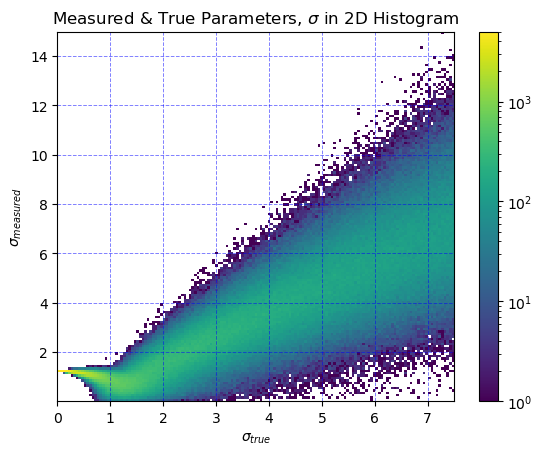

In [49]:
### Measured & True Parameters, $\sigma$ in 2D Histogram ###  
fig1, ax = plt.subplots()      
hist_sigma = plt.hist2d(sigma_true, sigma_best, bins = 151, norm = LogNorm())   
plt.xlabel(r"$\sigma_{true}$")
plt.ylabel(r"$\sigma_{measured}$")
plt.title(r"Measured & True Parameters, $\sigma$ in 2D Histogram")
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('2D_Histpgram_Sigma.pdf')
plt.colorbar(hist_sigma[3], ax = ax)
plt.show()


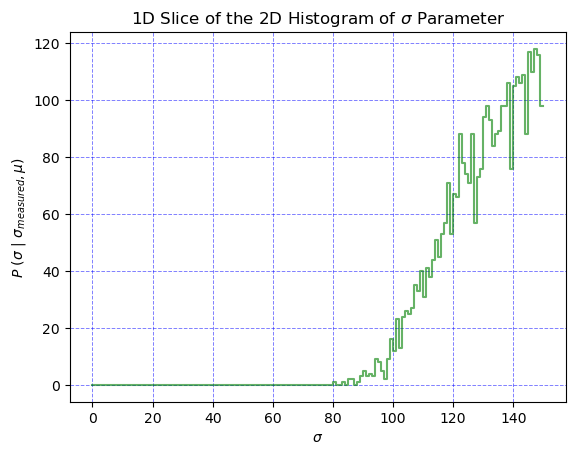

In [50]:
### Slice of the 2D Histogram of $\sigma$ Parameter ###
plt.plot(hist_sigma[0][:, 75], drawstyle = 'steps', color = 'g', alpha = 0.6)
plt.xlabel(r'$\sigma$')
plt.ylabel(r"$P ~ (\sigma ~ | ~ \sigma_{measured}, \mu)$")
plt.title(r'1D Slice of the 2D Histogram of $\sigma$ Parameter')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Slice_Sigma.pdf')
plt.show()

C:\Users\a828a124\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


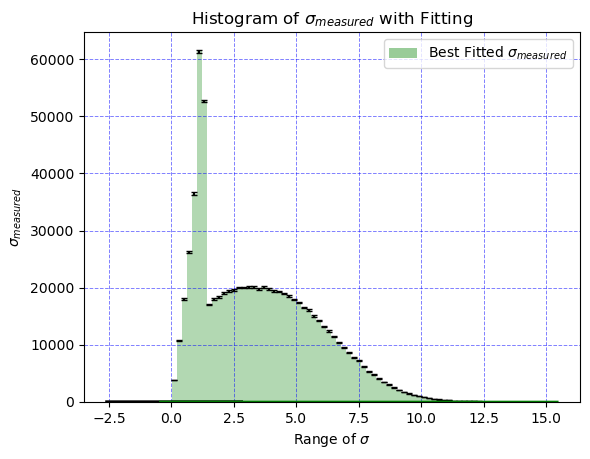

'plt.xlabel(r\'Range of $\\sigma$\')\nplt.ylabel(r"$\\sigma_{measured}$")\nplt.title(r\'Histogram of $\\sigma_{measured}$ with Errors\')\nplt.grid(color = \'b\', alpha = 0.5, linestyle = \'dashed\', linewidth = 0.7)\nplt.savefig(\'Measured_Sigma_Error.pdf\')\nplt.show()'

In [69]:
### Histogram of $\sigma_{measured}$ with Errors ###
fig, ax = plt.subplots()
y, binEdges, patches = ax.hist(sigma_best, bins= 75, density=False, alpha=0.3, color='g')
data = sigma_best
bin_centers = 0.5*(binEdges[1:] + binEdges[:-1])
bin_std = np.sqrt(y)
ax.errorbar(bin_centers, y, yerr=bin_std, fmt='none', ecolor='k', capsize=2)
ax.plot(x, p, 'k', linewidth=2)
sns.distplot(data, bins = 75, color = 'g', label = r'Best Fitted $\sigma_{measured}$')
plt.xlabel(r'Range of $\sigma$')
plt.ylabel(r"$\sigma_{measured}$") 
plt.title(r'Histogram of $\sigma_{measured}$ with Fitting')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Measured_Sigma_Fit.pdf')
plt.legend()
plt.show()
'''plt.xlabel(r'Range of $\sigma$')
plt.ylabel(r"$\sigma_{measured}$")
plt.title(r'Histogram of $\sigma_{measured}$ with Errors')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Measured_Sigma_Error.pdf')
plt.show()'''

C:\Users\a828a124\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


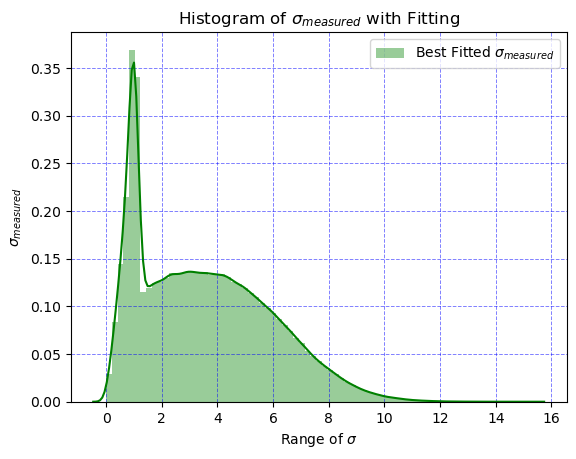

In [35]:
### Histogram of $\sigma_{measured}$ with Fitting ###
sns.distplot(data, bins = 75, color = 'g', label = r'Best Fitted $\sigma_{measured}$')
plt.xlabel(r'Range of $\sigma$')
plt.ylabel(r"$\sigma_{measured}$") 
plt.title(r'Histogram of $\sigma_{measured}$ with Fitting')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Measured_Sigma_Fit.pdf')
plt.legend()
plt.show()

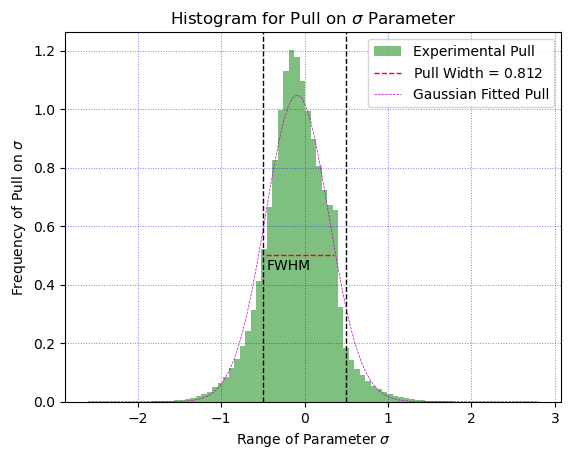

In [62]:
### Histogram for pull on $\sigma$ Parameter: Gaussian-Fit ###
pull_sigma = (sigma_best - sigma_true)/sigma
plt.hist(pull_sigma, 75, color = 'g', alpha = 0.5, density = True, label = 'Experimental Pull')
plt.axvline(-0.5, linestyle = 'dashed', color='black', linewidth = 1)
plt.axvline(0.5, linestyle = 'dashed', color='black', linewidth = 1)
#plt.axhline(0.5, linestyle = 'dashed', color='r', linewidth = 1)
plt.plot((-0.463, 0.349 ), (0.5, 0.5), 'r--', linewidth = 1, label = r'Pull Width = '+'${:.3f}$'.format(0.349 + 0.463))
plt.text(-0.45, .45, 'FWHM')
mu1, sigma1 = norm.fit(pull_sigma)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, sigma1)
plt.plot(x, p, 'm--', linewidth = 0.5, label = 'Gaussian Fitted Pull')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dotted', linewidth = 0.7)
plt.xlabel(r'Range of Parameter $\sigma$')
plt.ylabel(r"Frequency of Pull on $\sigma$")
plt.title(r'Histogram for Pull on $\sigma$ Parameter')
plt.legend()
plt.savefig('Pull_Sigma.pdf')
plt.show()

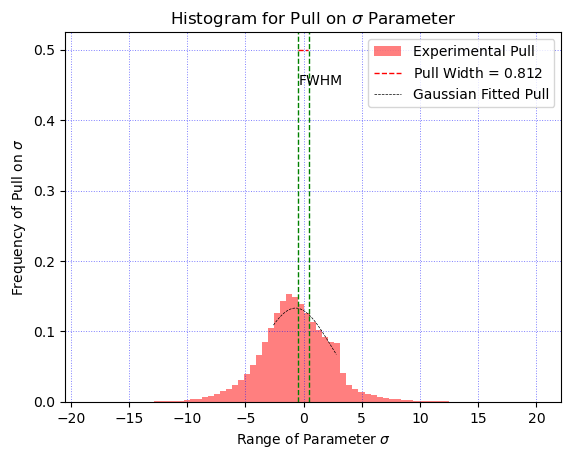

In [70]:
pull_sigma = (sigma_best - sigma_true) / sigma
mu, sigma = norm.fit(pull_sigma)

fig, ax = plt.subplots()
ax.hist(pull_sigma, bins=75, density=True, alpha=0.5, color='r', label='Experimental Pull')
ax.axvline(-0.5, linestyle='dashed', color='green', linewidth=1)
ax.axvline(0.5, linestyle='dashed', color='green', linewidth=1)
ax.plot((-0.463, 0.349), (0.5, 0.5), 'r--', linewidth=1, label=r'Pull Width = '+'${:.3f}$'.format(0.349 + 0.463))
plt.text(-0.45, .45, 'FWHM')
ax.plot(x, norm.pdf(x, mu, sigma), 'k--', linewidth=0.5, label='Gaussian Fitted Pull')
ax.set_xlabel(r'Range of Parameter $\sigma$')
ax.set_ylabel(r"Frequency of Pull on $\sigma$")
ax.set_title(r'Histogram for Pull on $\sigma$ Parameter')
ax.grid(color='b', alpha=0.5, linestyle='dotted', linewidth=0.7)
ax.legend()
plt.savefig('Pull_Sigma.pdf')
plt.show()








C:\Users\a828a124\AppData\Local\Temp\ipykernel_22220\19241077.py:1: RuntimeWarning: divide by zero encountered in true_divide
  pull_sigma = (sigma_best - sigma_true) / sigma_true


ValueError: supplied range of [-0.9951603260295523, inf] is not finite

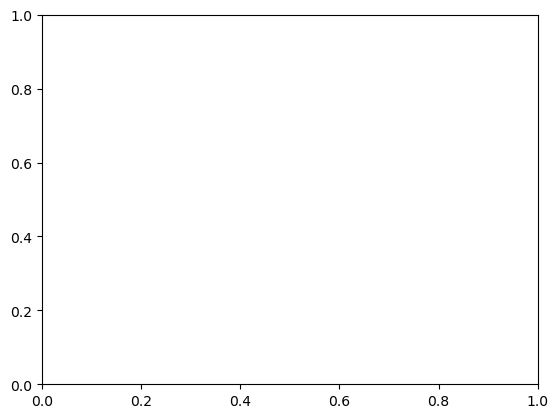

In [76]:
pull_sigma = (sigma_best - sigma_true) / sigma_true

# Plot the histogram of pulls
plt.hist(pull_sigma, bins=75, color='m', alpha=0.5, density=True, label='Experimental Pull')

# Add lines for +/- 0.5 pull
plt.axvline(-0.5, linestyle='dashed', color='green', linewidth=1)
plt.axvline(0.5, linestyle='dashed', color='green', linewidth=1)

# Add line for FWHM of pull distribution
pull_sigma_sorted = np.sort(pull_sigma)
half_max = np.max(pull_sigma) / 2.0
idx1 = np.argmin(np.abs(pull_sigma_sorted + half_max))
idx2 = np.argmin(np.abs(pull_sigma_sorted - half_max))
fwhm = np.abs(pull_sigma_sorted[idx1] - pull_sigma_sorted[idx2])
plt.plot((pull_sigma_sorted[idx1], pull_sigma_sorted[idx2]), (0.5, 0.5), 'r--', linewidth=1, label=r'Pull FWHM = {:.3f}'.format(fwhm))

# Fit the pull distribution to a Gaussian
mu, std = norm.fit(pull_sigma)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 75)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k--', linewidth=0.5, label='Gaussian Fitted Pull')

# Add labels and title to the plot
plt.grid(color='b', alpha=0.5, linestyle='dotted', linewidth=0.7)
plt.xlabel(r'Pull on $\sigma$')
plt.ylabel('Normalized Frequency')
plt.title(r'Histogram of Pull on $\sigma$ Parameter')

# Add a legend and save the plot to a file
plt.legend()
plt.savefig('Pull_Sigma.pdf')

# Show the plot
plt.show()




